In [73]:
import scipy.stats as st
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc

In [52]:
df = pd.read_csv("C:/Users/Lenovo/anaconda3/cardio.csv")
df.head(3)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [53]:
# Carga los datos y explóralos. Elimina los datos nulos o incorrectos.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


(4238, 16)

In [54]:
# Limpiar de valore nulo o incorrectos
df=df.dropna()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


(3656, 16)

In [55]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,8.561133,1.022657,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [56]:
# 2.-Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. 
#¿Cuaĺ presenta mayor dispersión?

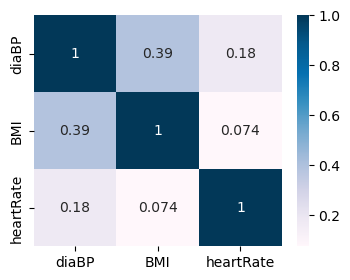

In [57]:
data=df.loc[:,'diaBP':'heartRate']

data['diaBP']= data['diaBP']/data['diaBP'].max()
data['BMI']= data['BMI']/data['BMI'].max()
data['heartRate']= data['heartRate']/data['heartRate'].max()

plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


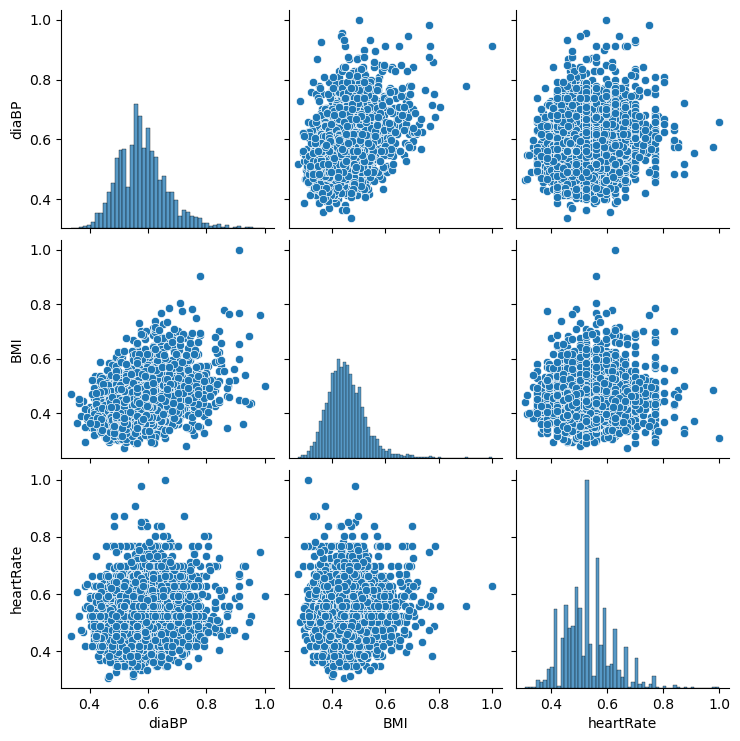

In [10]:
sns.pairplot(data)

In [11]:
data.describe()

,diaBP,BMI,heartRate
count,3656.000000,3656.000000,3656.000000
mean,0.581839,0.453947,0.529584
std,0.084034,0.071583,0.083797
min,0.336842,0.273592,0.307692
25%,0.526316,0.406338,0.475524
50%,0.575439,0.446831,0.524476
75%,0.631579,0.493662,0.573427
max,1.000000,1.000000,1.000000


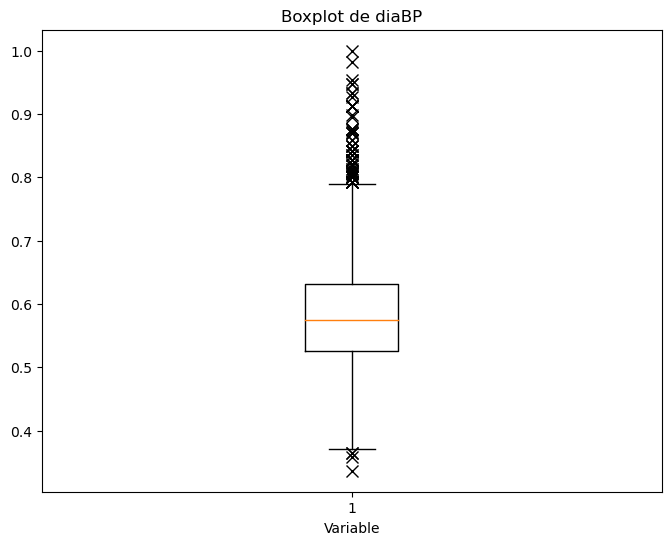

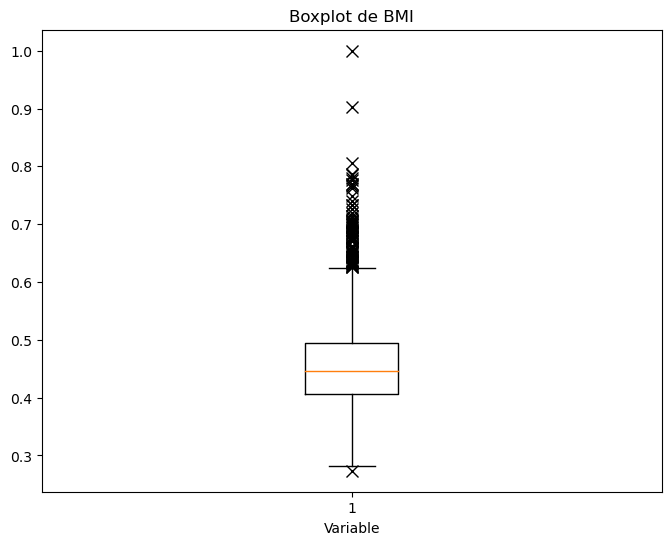

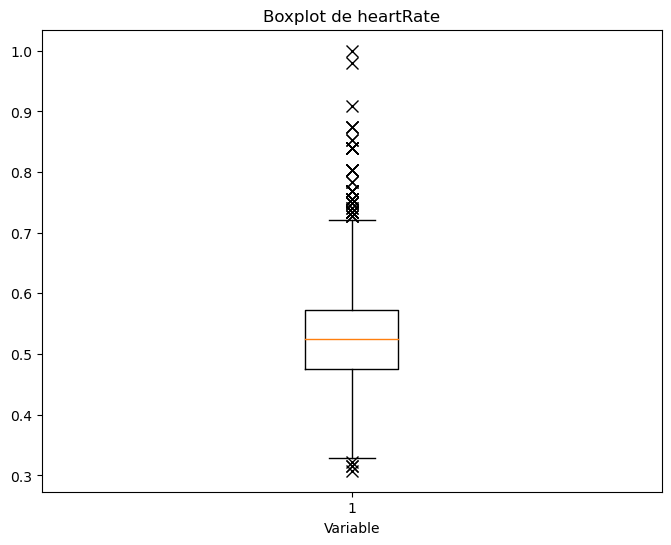

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['diaBP'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de diaBP')
plt.show()


plt.figure(figsize=(8, 6))
plt.boxplot(data['BMI'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de BMI')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(data['heartRate'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de heartRate')
plt.show()





In [ ]:
# Usamos escalado para poder comparar la dispersión, la myor dispersión la tienen las columnas diaBP y heartRate (mator std)

In [ ]:
#3.- Elimina los datos atípicos del dataset. Para las siguientes preguntas.

In [58]:
# Usamos variable dummyes para sex y currentSmoker
df = pd.get_dummies(df, columns=['sex'],drop_first=True).replace({'True': 1, 'False': 0})
df = pd.get_dummies(df, columns=['currentSmoker'],drop_first=True).replace({'True': 1, 'False': 0})

In [14]:
df.head(2)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,currentSmoker_Yes
0,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,True,False
1,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,False,False


In [59]:
df['sex_M']= df['sex_M'].replace({True: 1, False: 0})
df['currentSmoker_Yes']= df['currentSmoker_Yes'].replace({True: 1, False: 0})

In [16]:
df.head(2)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,currentSmoker_Yes
0,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0


In [17]:
# Usamos función para eliminar puntos atipicos.

def eliminar_atipicos(df):
    # Calcular el rango intercuartil (IQR) para cada columna
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Encontrar valores atípicos
    valores_atipicos = (df < lim_inf) | (df > lim_sup)

    # Eliminar valores atípicos
    df_sin_atipicos = df[~valores_atipicos.any(axis=1)]
    
    return df_sin_atipicos

In [18]:
df_limpia = eliminar_atipicos(df)


In [19]:
df_limpia.info()
df_limpia.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2695 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2695 non-null   int64  
 1   education          2695 non-null   float64
 2   cigsPerDay         2695 non-null   float64
 3   BPMeds             2695 non-null   float64
 4   prevalentStroke    2695 non-null   int64  
 5   prevalentHyp       2695 non-null   int64  
 6   diabetes           2695 non-null   int64  
 7   totChol            2695 non-null   float64
 8   sysBP              2695 non-null   float64
 9   diaBP              2695 non-null   float64
 10  BMI                2695 non-null   float64
 11  heartRate          2695 non-null   float64
 12  glucose            2695 non-null   float64
 13  TenYearCHD         2695 non-null   int64  
 14  sex_M              2695 non-null   int64  
 15  currentSmoker_Yes  2695 non-null   int64  
dtypes: float64(9), int64(7)
memor

(2695, 16)

In [ ]:
# 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


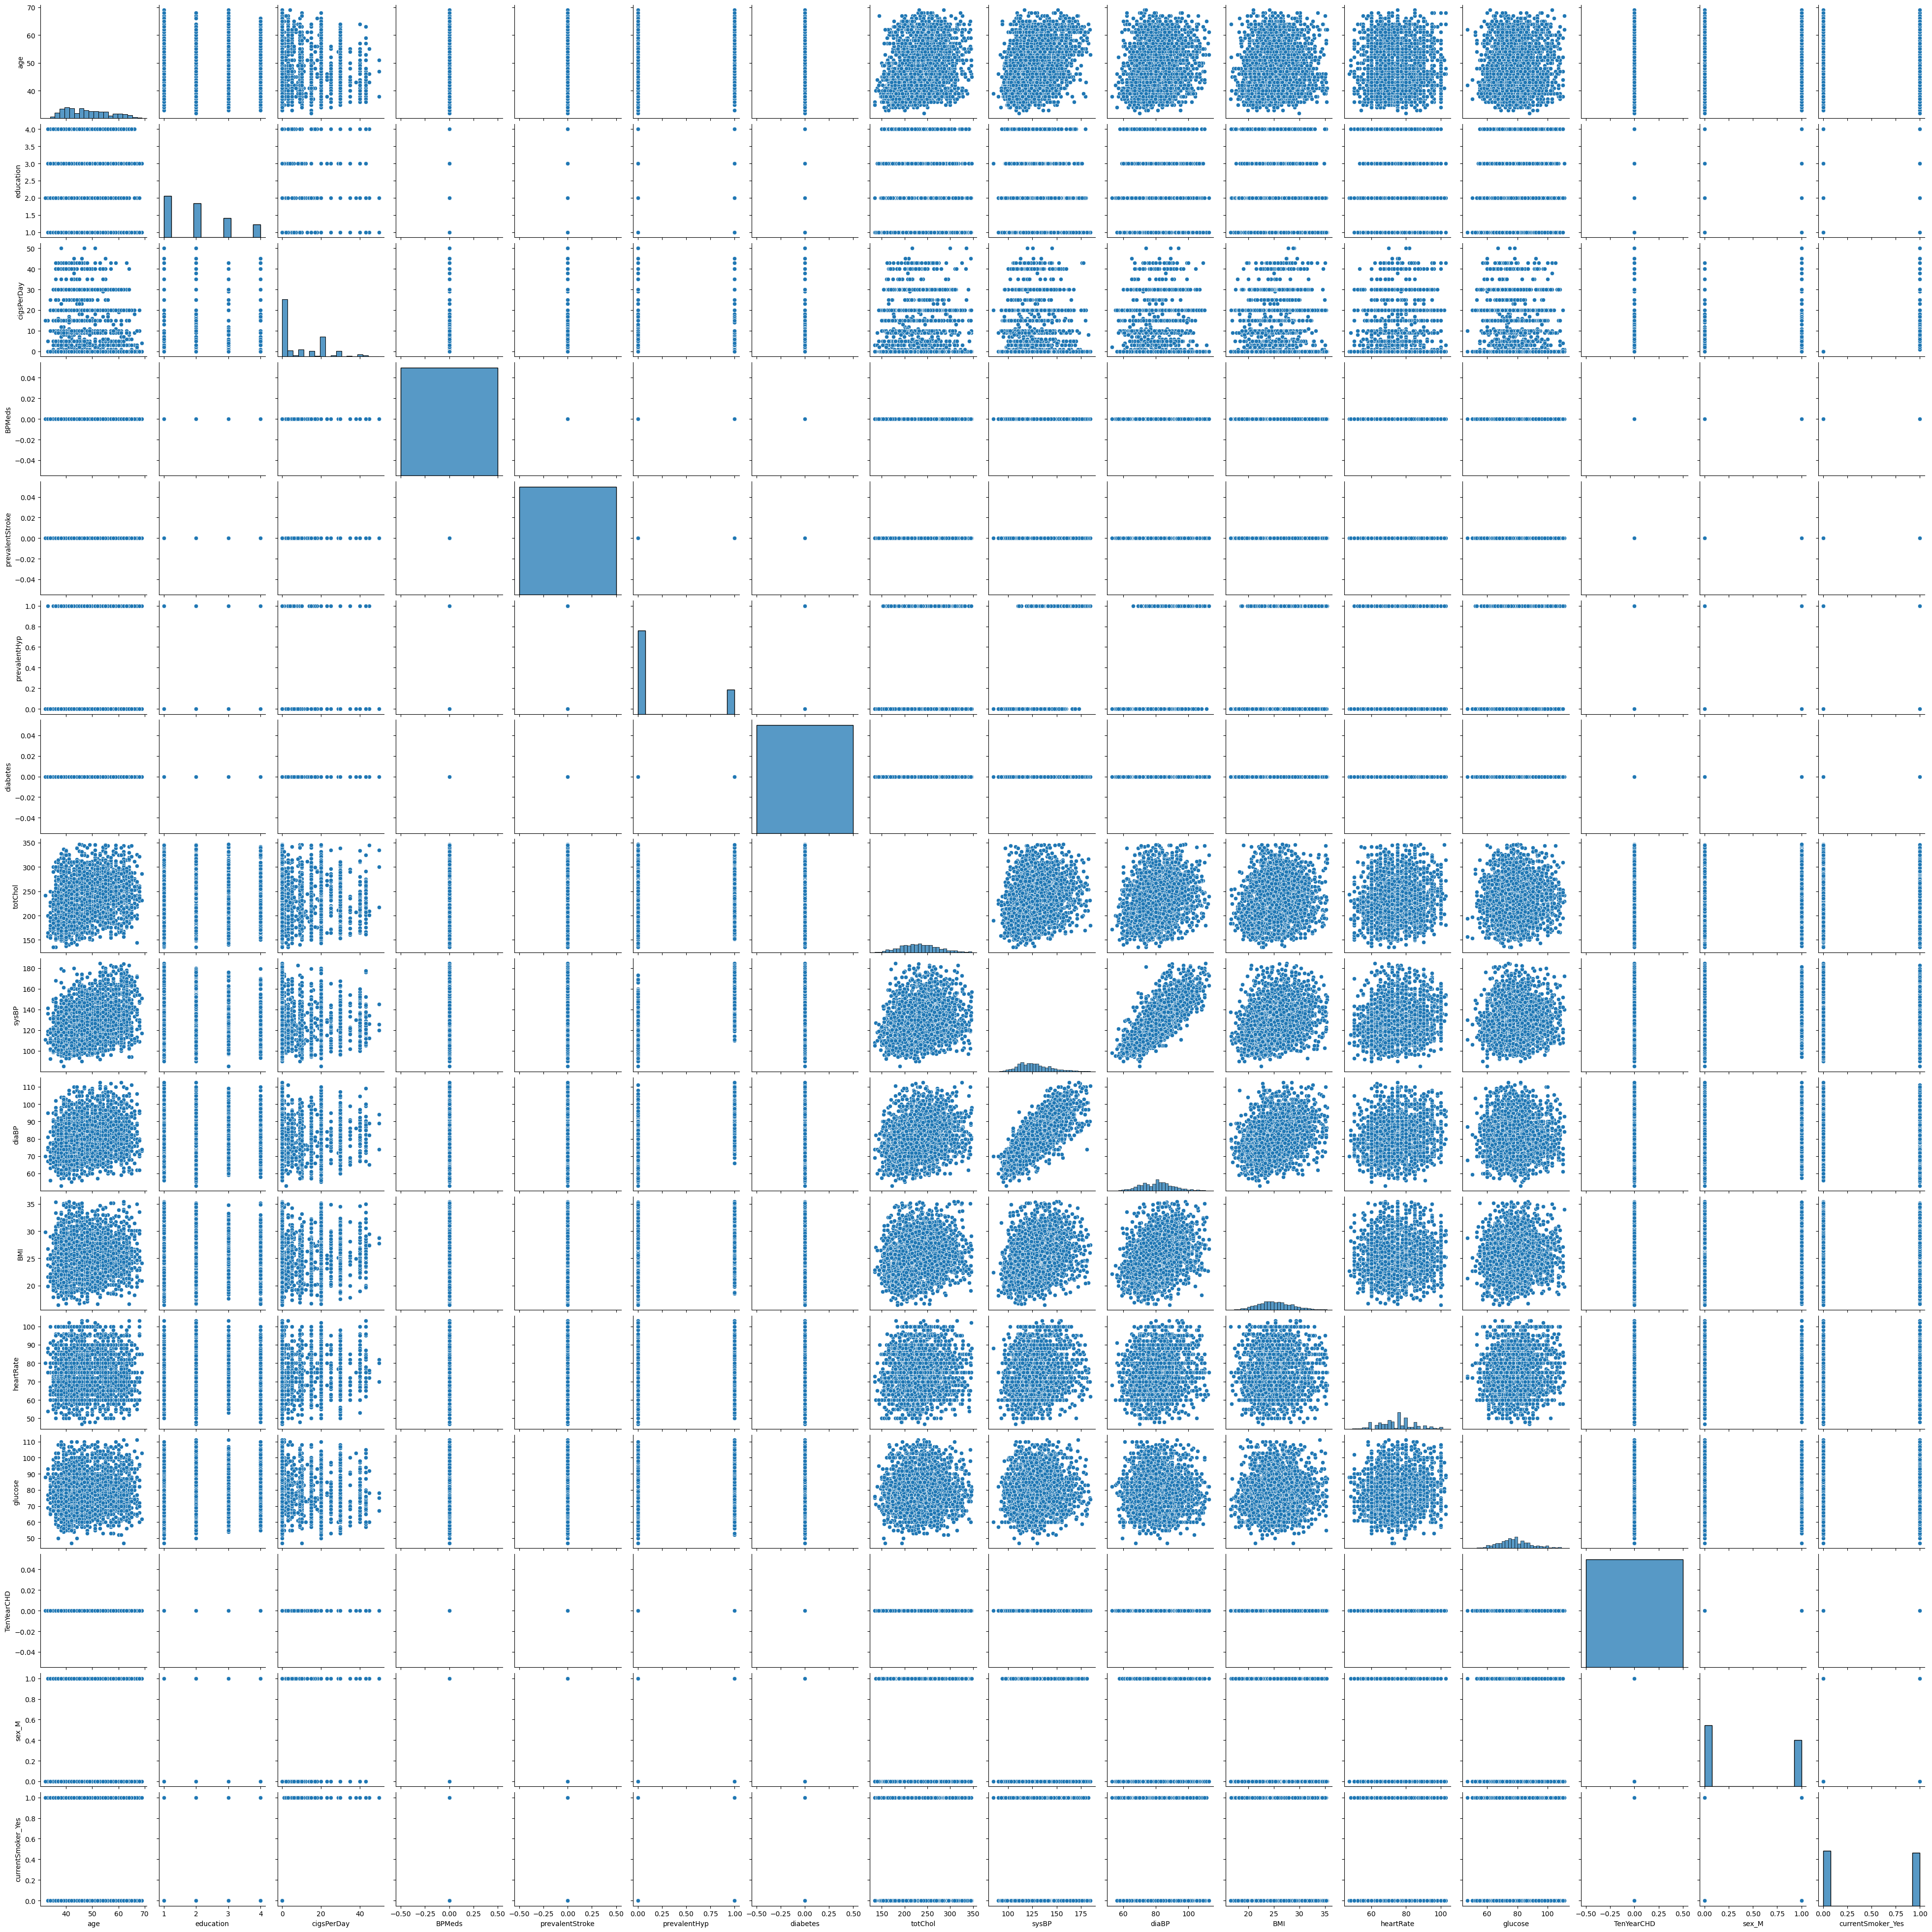

In [20]:
sns.pairplot(df_limpia)

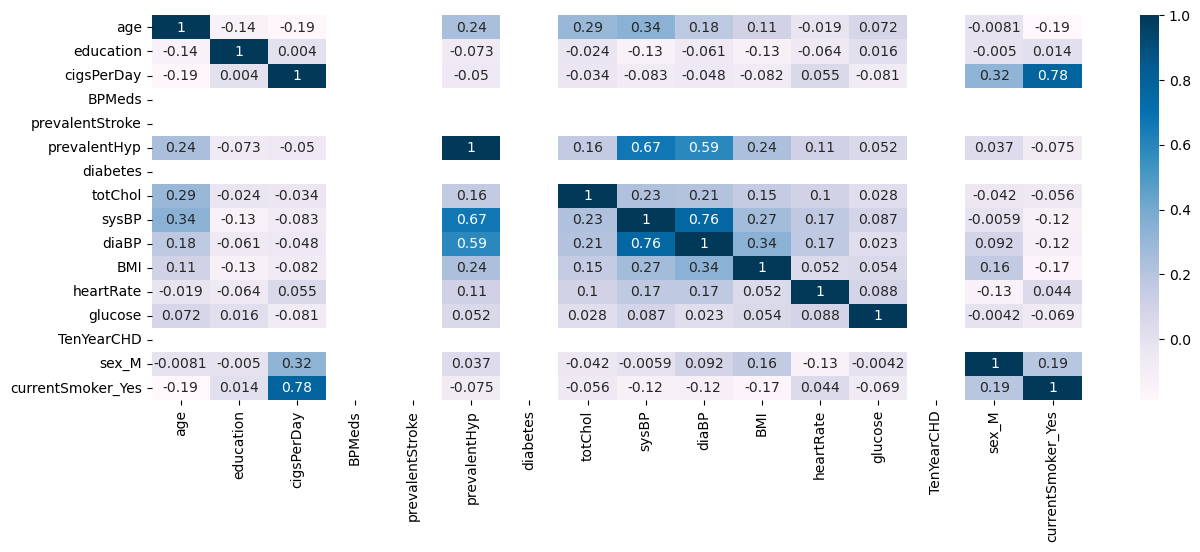

In [88]:
plt.figure(figsize=(15,5))
sns.heatmap(df_limpia.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
# Se observan mayor correlacion entre sysBP y prevalentHyp, diaBP y sysBP

In [ ]:
#5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
#índice de masa corporal?

In [28]:
lista_5 = df_limpia.loc[:,['sex_M','BMI']]
quartiles = np.percentile(lista_5['BMI'], [25, 50, 75])

print(quartiles)

[22.89 25.01 27.49]


In [29]:
q3= quartiles[2]
q3

27.49

In [30]:
mayor_cuartil = lista_5[lista_5['BMI'] > q3]
mayor_cuartil.shape[0] 

672

In [31]:
num_hombres = mayor_cuartil[mayor_cuartil['sex_M'] == 1].shape[0]
num_hombres

353

In [32]:
num_pacientes_mayor_cuartil = mayor_cuartil.shape[0]
probabilidad_hombre = num_hombres / num_pacientes_mayor_cuartil
print (f" La probabilidad es {probabilidad_hombre }")

 La probabilidad es 0.5252976190476191


In [33]:
#6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.
# Usartemos pruena de hipotesis.
# Ho: ritmo cardiaco = 45
# H1: ritmo cardianco <> 45

media =45
alfa=0.05

In [34]:
t_stat, p_value = st.ttest_1samp(df_limpia['heartRate'],media,alternative='two-sided')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

Valor t: 144.44274275656497
Valor p: 0.0



In [ ]:
# Dado que estadistico t es grande se rechaza la hiptesis nula, alfa es mayor a valor p.

In [ ]:
#7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

In [35]:
data_tot = df_limpia['cigsPerDay']
data_homb = df_limpia[df_limpia['sex_M'] == 1]['cigsPerDay']

In [36]:
# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = st.ttest_ind(data_tot, data_homb, equal_var=False)

# Nivel de significancia (alfa)
alpha = 0.05

# Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se rechaza la hipótesis nula")


print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

Resultado: Se rechaza la hipótesis nula
Valor t: -9.529034946235935
Valor p: 4.499340834373209e-21


In [ ]:
# Se acepta hipotesis alternatova existe diferencias en las medias poblaciones y media hombre, esto indica que la variable male afecta a cigsPerDay .

In [ ]:
# 8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables
# cualitativas). Evalúa tu modelo y explica.

In [60]:
#Definir variables predictoras (X) y variable de respuesta (y)
x = df[['glucose','heartRate','diaBP','sysBP','currentSmoker_Yes','sex_M']] 
y = df['BMI'] 

#Agregar una constante (intercepto) a las variables predictoras
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

#Obtener resultados del modelo
results = model.summary()

predictions = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     127.4
Date:                Wed, 22 May 2024   Prob (F-statistic):          8.83e-147
Time:                        21:55:09   Log-Likelihood:                -9967.4
No. Observations:                3656   AIC:                         1.995e+04
Df Residuals:                    3649   BIC:                         1.999e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.5809      0.56

In [ ]:
# El mododelo tiene un Rajustado  de 0.15 un F-estadístico bajo esto indica que el modelo de regresión no  es significativo, y por tanto no es un buen modelo.

In [ ]:
#9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
#Verifica el balanceo de datos y evalúa tu modelo.

In [62]:
# Se usaran las mismas variables que las usadas para regresión lineal.

X = df[['glucose','heartRate','diaBP','sysBP','currentSmoker_Yes','sex_M']] 
y = df['TenYearCHD']

# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo a los datos
model.fit(X, y)

# Realiza predicciones con el modelo
y_pred = model.predict(X)

# Calcula la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Genera un informe de clasificación que incluye precisión, recuperación y F1-score
report = classification_report(y, y_pred)
print('Informe de Clasificación:')
print(report)
print(df['TenYearCHD'].value_counts())

Precisión del modelo: 0.849015317286652
Matriz de Confusión:
[[3074   25]
 [ 527   30]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3099
           1       0.55      0.05      0.10       557

    accuracy                           0.85      3656
   macro avg       0.70      0.52      0.51      3656
weighted avg       0.81      0.85      0.79      3656

TenYearCHD
0    3099
1     557
Name: count, dtype: int64


AUC-ROC: 0.6898553596080973
AUC-PR: 0.3204982280653692


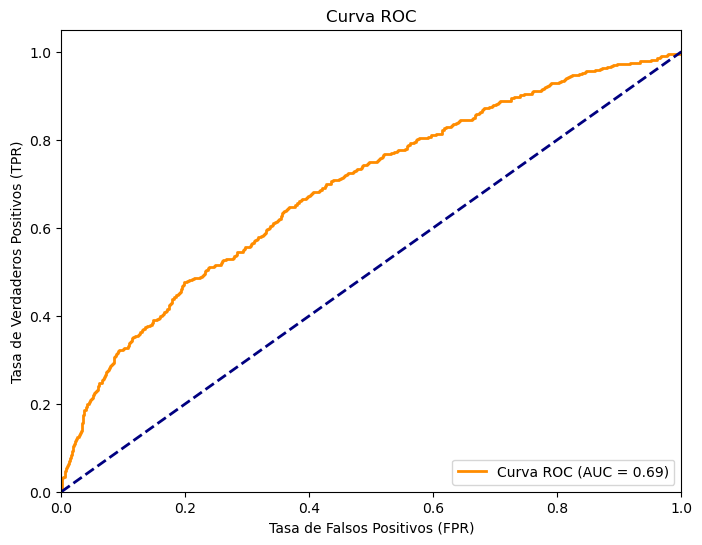

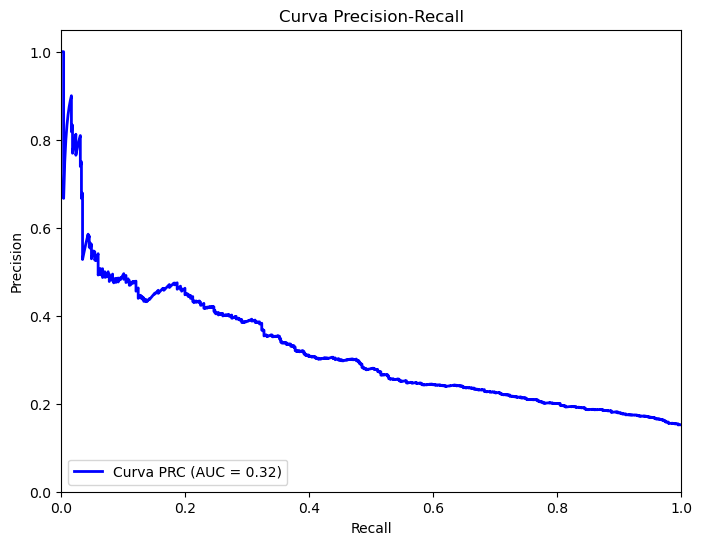

In [63]:
# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X)[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y, y_prob)
print(f'AUC-ROC: {roc_auc}')

# Calcular el AUC-PR
prc_auc = average_precision_score(y, y_prob)
print(f'AUC-PR: {prc_auc}')

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y, y_prob)

# Calcular la curva PRC
precision, recall, thresholds_prc = precision_recall_curve(y, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Graficar la curva PRC
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PRC (AUC = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Mostrar las curvas ROC y PRC
plt.show()




In [64]:
# Podemos ver que el modelo se encuentra desbalanceado, y que no es un buen modelo

In [ ]:
#10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.


In [ ]:
# Para regresión lineal:


In [65]:
#Definir variables predictoras (X) y variable de respuesta (y)
x = df[['glucose','heartRate','sex_M']] 
y = df['BMI'] 

#Agregar una constante (intercepto) a las variables predictoras
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

#Obtener resultados del modelo
results = model.summary()

predictions = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     22.28
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.71e-14
Time:                        22:06:38   Log-Likelihood:                -10282.
No. Observations:                3656   AIC:                         2.057e+04
Df Residuals:                    3652   BIC:                         2.060e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4678      0.478     46.985      0.0

In [66]:
#Definir variables predictoras (X) y variable de respuesta (y)
x = df[['diaBP','sysBP','currentSmoker_Yes']] 
y = df['BMI'] 

#Agregar una constante (intercepto) a las variables predictoras
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

#Obtener resultados del modelo
results = model.summary()

predictions = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 22 May 2024   Prob (F-statistic):          6.00e-141
Time:                        22:06:43   Log-Likelihood:                -9989.0
No. Observations:                3656   AIC:                         1.999e+04
Df Residuals:                    3652   BIC:                         2.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.6207      0.44

In [ ]:
# Al menos con las variables separadas para regresión lineal no existe una mejora considerable en R ajustado.

In [ ]:
# respecto a la regresión logistica.

In [67]:
X = df[['glucose','heartRate','sex_M']] 
y = df['TenYearCHD']

# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo a los datos
model.fit(X, y)

# Realiza predicciones con el modelo
y_pred = model.predict(X)

# Calcula la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Genera un informe de clasificación que incluye precisión, recuperación y F1-score
report = classification_report(y, y_pred)
print('Informe de Clasificación:')
print(report)
print(df['TenYearCHD'].value_counts())

Precisión del modelo: 0.848741794310722
Matriz de Confusión:
[[3094    5]
 [ 548    9]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3099
           1       0.64      0.02      0.03       557

    accuracy                           0.85      3656
   macro avg       0.75      0.51      0.47      3656
weighted avg       0.82      0.85      0.78      3656

TenYearCHD
0    3099
1     557
Name: count, dtype: int64


In [68]:
X = df[['diaBP','sysBP','currentSmoker_Yes']] 
y = df['TenYearCHD']

# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo a los datos
model.fit(X, y)

# Realiza predicciones con el modelo
y_pred = model.predict(X)

# Calcula la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Genera un informe de clasificación que incluye precisión, recuperación y F1-score
report = classification_report(y, y_pred)
print('Informe de Clasificación:')
print(report)
print(df['TenYearCHD'].value_counts())

Precisión del modelo: 0.8479212253829321
Matriz de Confusión:
[[3084   15]
 [ 541   16]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3099
           1       0.52      0.03      0.05       557

    accuracy                           0.85      3656
   macro avg       0.68      0.51      0.49      3656
weighted avg       0.80      0.85      0.79      3656

TenYearCHD
0    3099
1     557
Name: count, dtype: int64


In [ ]:
# en ambos casos baja la precisión del modelo y se mantiene el desbalanceo.